In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import jupytext

In [2]:
dfile = r'C:\Users\chris_pedretti\Downloads\hw1_data.csv'

In [3]:
hdata = pd.read_csv(dfile)

In [4]:
nsamples = len(hdata)
print(f'{nsamples} samples in the dataset')

1460 samples in the dataset


In [5]:
# Check data types of columns
data_types = hdata.dtypes

In [6]:
# Separate columns into categorical and continuous based on data types
categvars = data_types[data_types == "object"]
continuvars = data_types[data_types != "object"]

In [7]:
numcateg = len(continuvars)
numcontinu = len(categvars)

In [8]:
ncols = hdata.shape[1]
print(f"{ncols} total features")
print("Number of categorical features:", numcontinu)
print("Number of continuous features:", numcateg)


81 total features
Number of categorical features: 43
Number of continuous features: 38


In [9]:
# Access the column
column_data = hdata['SalePrice']

In [10]:
# Calculate the minimum, maximum, mean, and standard deviation
column_min = column_data.min()
column_max = column_data.max()
column_mean = column_data.mean()
column_std = column_data.std()

In [11]:
print("Minimum:", column_min)
print("Maximum:", column_max)
print("Mean:", column_mean)
print("Standard Deviation:", column_std)

Minimum: 34900
Maximum: 755000
Mean: 180921.19589041095
Standard Deviation: 79442.50288288662


In [12]:
mvalues = hdata.isnull().sum()
#print(type(mvalues)) was confused that mvalues was a dataframe of true/falses rather than an int...
pmissing = (mvalues / nsamples) * 100

In [13]:
# Print the percentage of missing values for each feature
for feature, percentage in zip(pmissing.index, pmissing):
    print(f"Percentage of missing values in '{feature}': {percentage:.2f}%")

Percentage of missing values in 'Id': 0.00%
Percentage of missing values in 'MSSubClass': 0.00%
Percentage of missing values in 'MSZoning': 0.00%
Percentage of missing values in 'LotFrontage': 17.74%
Percentage of missing values in 'LotArea': 0.00%
Percentage of missing values in 'Street': 0.00%
Percentage of missing values in 'Alley': 93.77%
Percentage of missing values in 'LotShape': 0.00%
Percentage of missing values in 'LandContour': 0.00%
Percentage of missing values in 'Utilities': 0.00%
Percentage of missing values in 'LotConfig': 0.00%
Percentage of missing values in 'LandSlope': 0.00%
Percentage of missing values in 'Neighborhood': 0.00%
Percentage of missing values in 'Condition1': 0.00%
Percentage of missing values in 'Condition2': 0.00%
Percentage of missing values in 'BldgType': 0.00%
Percentage of missing values in 'HouseStyle': 0.00%
Percentage of missing values in 'OverallQual': 0.00%
Percentage of missing values in 'OverallCond': 0.00%
Percentage of missing values in '

In [14]:
# Excludes categorical data from correlation function... not specified whether we should use one hot encoding or not so decided to omit them
#continuous_only is a dataframe that only contains the continuous data. I wanted to use continuvars above here and not use this line but I cannot figure out how to, 
continuous_only = hdata.select_dtypes(include=['number'])

In [15]:
tfeature = 'SalePrice'

In [16]:
corrs= continuous_only.corr()[tfeature]
#sorts the correlations descending and takes the highest two correlations.
sorted_corrs = corrs.sort_values(ascending=False)[1:3]
print(sorted_corrs)

OverallQual    0.790982
GrLivArea      0.708624
Name: SalePrice, dtype: float64


In [17]:
# Extract relevant columns
grlivarea = hdata['GrLivArea']
overallqual = hdata['OverallQual']
saleprice = hdata['SalePrice']

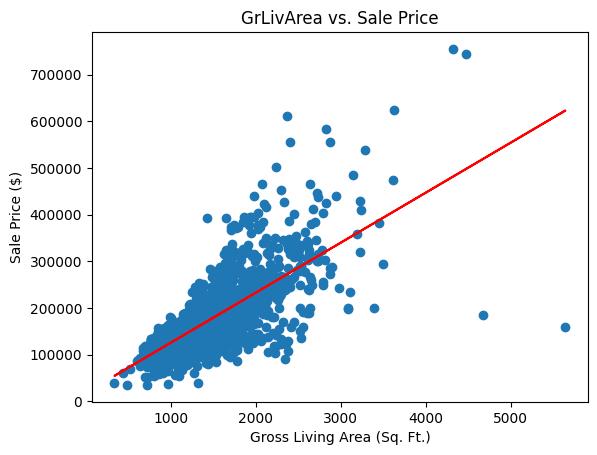

In [18]:
# Scatter plot 1: GrLivArea vs. SalePrice
m, b = np.polyfit(grlivarea, saleprice,1)
y_fit = m * grlivarea + b
#line of best fit

plt.scatter(grlivarea, saleprice)
plt.xlabel('Gross Living Area (Sq. Ft.)')
plt.ylabel('Sale Price ($)')
plt.title('GrLivArea vs. Sale Price')
plt.plot(grlivarea, y_fit, 'r')



In [19]:
# Show the first scatter plot
plt.show()

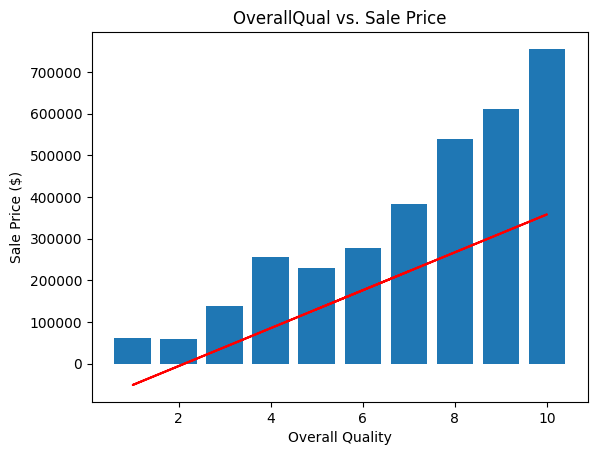

In [24]:
# Scatter plot 2: OverallQual vs. SalePrice
m, b = np.polyfit(overallqual, saleprice,1)
y_fit = m * overallqual + b
#line of best fit

plt.bar(overallqual, saleprice)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price ($)')
plt.title('OverallQual vs. Sale Price')
plt.plot(overallqual, y_fit, 'r')

In [21]:
# Show the second scatter plot
plt.show()

DISCUSSION
As per the data and two graphs, Overall Quality and Gross Living area are both highly positively correlated with Sales Price. This means that as O.Q. or GLA goes up, sales price follows.
The graphs do a good job of visualizing that relationship, as we can see with the scatter plot and bar graphs. A scatter plot was most applicable for grlivingarea given both are continuous variables.
Overall Quality is on a 1-10 scale, so it can be expressed both categorically or continously. A bar chart was most applicable considering data doesn't fall outside of the rigid 1-10 rankings.
Both display a strong positive linear trend upward, suggesting high correlation. Logically, this makes sense as well. We would expect homes that have larger square footage and/or a higher overall quality rating to cost more.

In [22]:
#py_file = 'hw1.py'
#jupytext.write(jupytext.read(py_file), 'pedretti_christopher_hw1.ipynb')